In [1]:
import pandas as pd
import numpy as np
import os 
import sys
import matplotlib.pyplot as plt 

import sys, os
parent_dir = os.getcwd()
path = os.path.dirname(parent_dir)
sys.path.append(path)

In [2]:
def process_data(timestamp, algo):
    input_path = f"experiments/logs/Homer_SimpleEnv/{algo}/{ts}/"
    device_pth = "/home/ds1/w210/home-energy-optimizer/"+"data/debug/device_list.csv"
    devices = pd.read_csv(device_pth)["device_id"].tolist()
    cols = [
        'device_id',
        'no_solar_cumulative_reward', 
        'no_battery_cumulative_reward',
        'sq_cumulative_reward',
        'cumulative_reward',
    ]
    df_list = []
    for device in devices:
        df = pd.read_csv("/home/ds1/w210/home-energy-optimizer/"
                    +input_path+f"{device}_results_array.csv")
        df_list.append(df[cols].tail(1).copy())
    combined_df = pd.concat(df_list)    

    cols2=['no_solar_cumulative_reward','no_battery_cumulative_reward','sq_cumulative_reward','cumulative_reward']
    labels = ['No Solar','Solar Only','Solar and Battery',f'HOMER - {algo.upper()}']
    agg_df = (combined_df[cols2].agg(['mean', 'std']))

    return combined_df, agg_df, labels, cols2

def process_local_data(algo):
    #input_path = f"experiments/logs/Homer_SimpleEnv/{algo}/{ts}/"
    #device_pth = "/home/ds1/w210/home-energy-optimizer/"+"data/debug/device_list.csv"
    #devices = pd.read_csv(device_pth)["device_id"].tolist()
    cols = [
        'device_id',
        'no_solar_cumulative_reward', 
        'no_battery_cumulative_reward',
        'sq_cumulative_reward',
        'cumulative_reward',
    ]
    df_list = []
    
    algo_dir = directory+algo
    
    for filename in os.listdir(algo_dir):
        if filename != 'aggregated_result_summary.csv':
            df = pd.read_csv(algo_dir+'/'+filename)
            df_list.append(df[cols].tail(1).copy())
    combined_df = pd.concat(df_list)    

    cols2=['no_solar_cumulative_reward','no_battery_cumulative_reward','sq_cumulative_reward','cumulative_reward']
    labels = ['No Solar','Solar Only','Expert Manual Model',f'HOMER RL - {algo.upper()}']
    agg_df = (combined_df[cols2].agg(['mean', 'std']))

    return combined_df, agg_df, labels, cols2

In [9]:
ts = "221129-205149"
algo =  'sac'

df, agg_df, labels, cols2 = process_data(ts, algo)
agg_df

,no_solar_cumulative_reward,no_battery_cumulative_reward,sq_cumulative_reward,cumulative_reward
mean,-574.319837,-191.881549,-28.199398,-141.687006
std,589.692851,360.016091,280.149703,335.756558


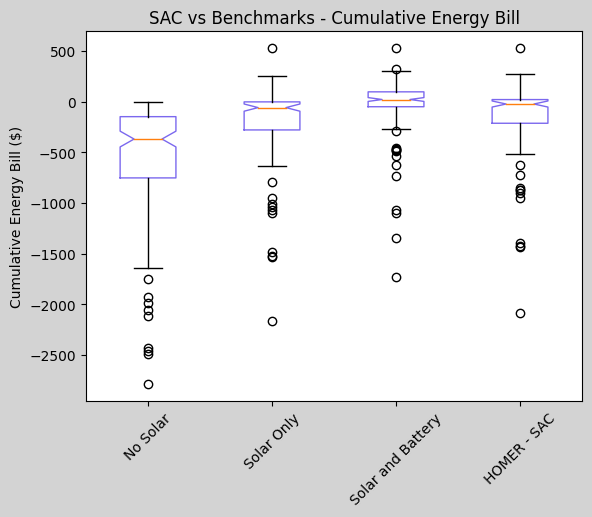

In [10]:
fig1, ax1 = plt.subplots()
ax1.set_title(f'{algo.upper()} vs Benchmarks - Cumulative Energy Bill')
ax1.boxplot(df[cols2], notch = True,boxprops=dict(color='mediumslateblue'))
ax1.set_xticklabels(labels=labels, rotation = 45)
ax1.set_ylabel('Cumulative Energy Bill ($)')
fig1.set_facecolor("lightgrey")

Text(0.5, 0, 'Device Number')

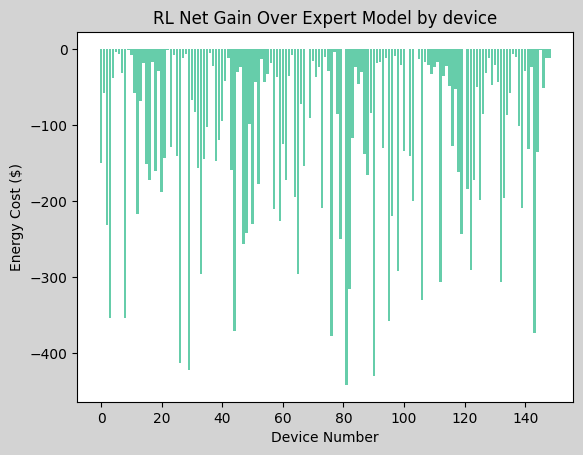

In [11]:
plt.figure(facecolor='lightgrey')
plt.bar(
    x=range(len(df)), 
    height = df['cumulative_reward'] - df['sq_cumulative_reward'],
    color='mediumaquamarine'
)
plt.title('RL Net Gain Over Expert Model by device')
plt.ylabel("Energy Cost ($)")
plt.xlabel("Device Number")

#ax = plt.axes()
#ax.set_facecolor("lightgrey")

In [13]:
agg_df

,no_solar_cumulative_reward,no_battery_cumulative_reward,sq_cumulative_reward,cumulative_reward
mean,-574.319837,-191.881549,-28.199398,-141.687006
std,589.692851,360.016091,280.149703,335.756558
